# Random Forest

#### Index<a name="index"></a>
1. [Import packages](#imports)
2. [Load data](#loadData)
3. [Set up classifier data](#setupData)

## 1. Import packages<a name="imports"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### Aestetic settings

In [2]:
%matplotlib inline

sns.set(font_scale=1.3, style="ticks")

## 2. Load data<a name="loadData"></a>

In [3]:
number_clusters = 1229

In [5]:
true_clusters_2d_hist_file = f'../data/true_clusters_2d_hist_{number_clusters}.npy'
true_clusters_2d_hist = np.load(true_clusters_2d_hist_file, allow_pickle=True)

false_clusters_2d_hist_file = f'../data/unif_non_clusters_2d_hist_{number_clusters}.npy'
false_clusters_2d_hist = np.load(false_clusters_2d_hist_file, allow_pickle=True)

In [6]:
print(np.shape(true_clusters_2d_hist))
print(np.shape(false_clusters_2d_hist))

(1229, 400)
(1229, 400)


## 3. Set up classifier data<a name="setupData"></a>

In [6]:
all_clusters = np.concatenate((true_clusters_2d_hist, 
                               false_clusters_2d_hist))
true_labels = np.concatenate((np.ones_like(true_clusters_2d_hist[:, 0]), 
                              np.zeros_like(true_clusters_2d_hist[:, 0])))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(all_clusters, true_labels)

## 4. Classification<a name="classification"></a>

In [8]:
def plot_confusion_matrix(y_true, y_pred, title, target_names, normalize=True):
    cm = confusion_matrix(y_true, y_pred, labels=target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    annot = np.around(cm, 2)
    
    dict_label_to_real = {0:'False Cluster', 1:'True Cluster'}
    target_names = np.vectorize(dict_label_to_real.get)(target_names)

    fig, ax = plt.subplots(figsize=(7, 5.5))
    sns.heatmap(cm, xticklabels=target_names,
                yticklabels=target_names, cmap='Blues',
                annot=annot, lw=0.5, vmin=0, vmax=1, 
                annot_kws={"size": 20})

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_aspect('equal')
    plt.title(title)
    return cm, fig

### Baseline

`max_depth`=2

In [9]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9382113821138212
[[265  38]
 [  0 312]]


Normalized confusion matrix
[[1.         0.        ]
 [0.12541254 0.87458746]]


(array([[1.        , 0.        ],
        [0.12541254, 0.87458746]]),
 <Figure size 504x396 with 2 Axes>)

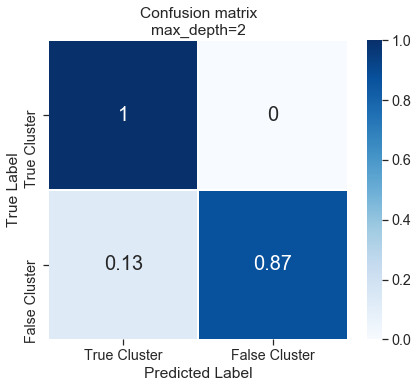

In [10]:
plot_confusion_matrix(y_test, y_pred, 'Confusion matrix\nmax_depth=2', [1, 0])

### `max_depth`=20

In [11]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9951219512195122
[[300   3]
 [  0 312]]


Normalized confusion matrix
[[1.         0.        ]
 [0.00990099 0.99009901]]


(array([[1.        , 0.        ],
        [0.00990099, 0.99009901]]),
 <Figure size 504x396 with 2 Axes>)

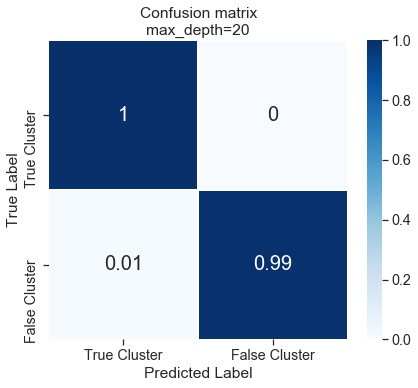

In [12]:
plot_confusion_matrix(y_test, y_pred, 'Confusion matrix\nmax_depth=20', [1, 0])

Go to [Index](#index)